# Data Analysis - Programming
## Week 8
## Oefeningen

Bij de onderstaande oefeningen hoort een [zipfile](http://www.flotwiskunde.nl/2008.zip) met 3 bestanden:
- `variables.txt` - uitleg over de kolommen in de onderstaande bestanden
- `2008.csv` - vluchtdata van vluchten van en naar de US in 2008 (7009729 regels)
- `2008_excerpt.csv` - vluchtdata van vluchten van en naar de US in 2008 (eerste 1000 regels van 2008.csv)

_Let op:_ probeer het bestand 2008.csv niet met een ander programma dan Python te openen, want dat bestand is groot en dat kunnen de meeste pakketten niet aan.

In [1]:
%pylab
%matplotlib inline
import scipy.stats as st
from datetime import datetime

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


### Oefening 1 <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

Bestudeer het bestand `variables.txt` om te zien welke variabelen (kolommen) in de data aanwezig zijn.  
Bekijk het bestand `2008_excerpt.txt` en experimenteer met het inladen van de data in Python.

Zodra je ervan overtuigd bent dat je de gegevens in 2008_excerpt.csv soepel in kunt laden, probeer dan de gegevens in 2008.csv in te laden.

In [4]:
# oefening 1

filename = "data/2008_excerpt.csv"
filename = "data/2008.csv"  # comment to use excerpt


def read_data(filename):
    # useful columns: date (yyyy, mm, dd) and arrival time (hhmm)
    columns = [0, 1, 2, 6]
    lines = []
    errors = []
    with open(filename, "r") as file:
        for i, line in enumerate(file):
            # filter to speed up processing:
            # splitting is expensive, checking for a substring less so
            if ",JFK," in line:
                fields = line.split(",")
                # flight arrives at JFK (17), is not cancelled (21) or diverted (23)
                if fields[17] == "JFK" and fields[21] != "1" and fields[23] != "1":
                    try:
                        lines.append(np.datetime64(
                            "{:>04}-{:>02}-{:>02}T{:>02}:{:>02}".format(
                                fields[0], fields[1], fields[2],
                                int(fields[6]) // 100, int(fields[6]) % 100
                            )
                        ))
                    except:
                        if int(fields[6]) // 100 == 24:
                            lines.append(np.datetime64(
                                "{:>04}-{:>02}-{:>02}T{:>02}:{:>02}".format(
                                    fields[0], fields[1], fields[2], 0, 0
                                )
                            ) + np.timedelta64(1, "D"))
                        else:
                            errors.append("Invalid values in line {}: {},{},{},{}".format(
                                    i, fields[0], fields[1], fields[2], fields[6]))
                        
    return np.sort(np.array(lines, dtype=np.datetime64)), errors

In [5]:
%timeit -n 1 -r 1 data, errors = read_data(filename)

1 loop, best of 1: 5.86 s per loop


### Oefening 2 <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

We zijn geinteresseerd in aankomsttijden van de vluchten op John F. Kennedy Airport, New York.  
Hoeveel vluchten kwamen aan op John F. Kennedy Airport in 2008 volgens het bestand 2008.csv?

In [208]:
print("Number of arrivals at JFK read: {}".format(len(data)))

Number of arrivals at JFK read: 115072


### Oefening 3 <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />

Bepaal de aankomsttijden voor alle vluchten die aankwamen op John F. Kennedy Airport in 2008.  
Bepaal de tussentijden voor alle vluchten die aankwamen op John F. Kennedy Airport in 2008. Dat wil zeggen: bereken van ieder opeenvolgend paar aankomsten de tijd (in minuten) tussen de aankomsten.

In [209]:
# aankomsttijden zijn al bepaal bij inlezen bestand,
# tussentijden zijn nu snel te bepalen
diffs = data[1:] - data[:-1]
# bij de berekeningen hieronder zijn tussentijden als floating point
# handiger dan tussentijden in np.timedelta64
diffs = diffs.astype('float')

### Oefening 4 <img src="images/stars_3.png" alt="3 star" style="display: inline; margin-top: -5px" />

In week 6 heb je geleerd hoe je kunt beoordelen of een verzameling meetpunten normaal verdeeld is.  
Vergelijkbare methoden zou je kunnen gebruiken om in te schatten of een variabele exponentieel verdeeld is.  

Schrijf Python code waarmee je in kunt schatten of de tussentijden van aankomsten op John F. Kennedy Airport exponentieel vedeeeld zijn.

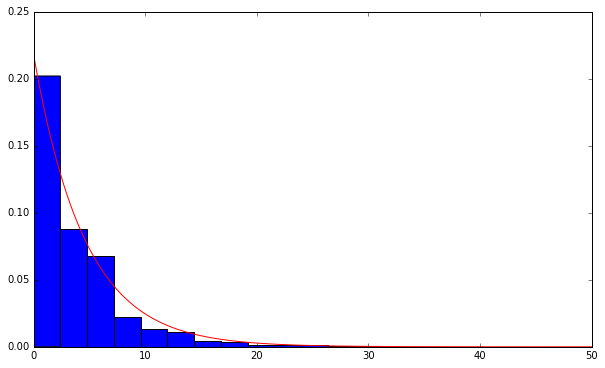

In [210]:
# Eerste methode van vergelijken distributie:
# Genormaliseerd histogram (opp=1) uitzetten
# tegen exponentiele distributie met lambda = 1 / mu_data
plt.figure(1, figsize=(10, 6))
# let op:
# histogram toont alleen eerste 99.5% van alle meetwaarden
# om te voorkomen dat uitschieters de plot onleesbaar maken
counts, bins, patches = plt.hist(
    diffs,
    bins=20,
    range=(0, np.percentile(diffs, 99.5)),
    normed=True
)
X = st.expon(scale=diffs.mean())
x = np.linspace(0, 50, 1000)
y = X.pdf(x)
plt.plot(x, y, color='red')
plt.show()

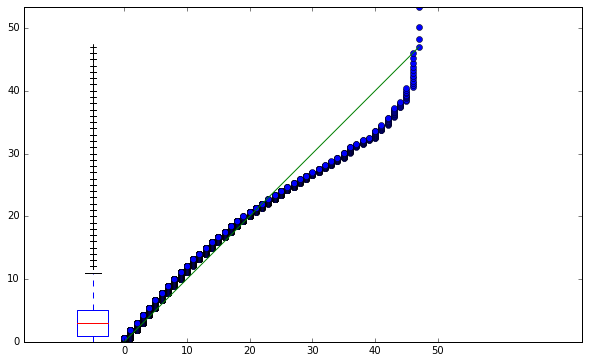

In [211]:
# Derde methode: qq-plot
plt.figure(1, figsize=(10, 6))
X = st.expon(scale=diffs.mean())
# let op:
# plot toont alleen eerste 99.5% van alle meetwaarden
# om te voorkomen dat uitschieters de plot bepalen 
x = sort(diffs[diffs < np.percentile(diffs, 99.5)])
probs = linspace(1, len(x), num=len(x)) / len(x)
y = X.ppf(probs)
plt.plot(x[:-1], y[:-1], "o ")
plt.plot([x.min(), x.max()], [x.min(), x.max()], "-")
plt.axis('equal')
plt.yticks(np.arange(0, x.max() + 10, 10), np.arange(0, x.max() + 10, 10, dtype=int_))
plt.xticks(np.arange(0, x.max() + 10, 10), np.arange(0, x.max() + 10, 10, dtype=int_))
plt.xlim(0, x.max() + 10)
# add boxplot to get an indication of counts of datapoints in plot
plt.boxplot(x, vert=True, positions=[-5], widths=[5], manage_xticks=False)
plt.show()